In [1]:
!pip install -q kaggle

now copy the directory

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp kaggle.json ~/.kaggle

Download the dataset from the kaggle

In [4]:
!kaggle datasets download -d saumyamohandas/animal-dataset

 98% 61.0M/62.3M [00:00<00:00, 222MB/s]
100% 62.3M/62.3M [00:00<00:00, 209MB/s]


Unzip the dataset

In [5]:
!unzip /content/animal-dataset.zip

Archive:  /content/animal-dataset.zip
  inflating: dataset/Testing/bears/k4 (100).jpeg  
  inflating: dataset/Testing/bears/k4 (100).jpg  
  inflating: dataset/Testing/bears/k4 (101).jpeg  
  inflating: dataset/Testing/bears/k4 (101).jpg  
  inflating: dataset/Testing/bears/k4 (102).jpeg  
  inflating: dataset/Testing/bears/k4 (102).jpg  
  inflating: dataset/Testing/bears/k4 (103).jpeg  
  inflating: dataset/Testing/bears/k4 (104).jpeg  
  inflating: dataset/Testing/bears/k4 (105).jpeg  
  inflating: dataset/Testing/bears/k4 (106).jpeg  
  inflating: dataset/Testing/bears/k4 (107).jpeg  
  inflating: dataset/Testing/bears/k4 (108).jpeg  
  inflating: dataset/Testing/bears/k4 (109).jpeg  
  inflating: dataset/Testing/bears/k4 (110).jpeg  
  inflating: dataset/Testing/bears/k4 (71).jpg  
  inflating: dataset/Testing/bears/k4 (72).jpeg  
  inflating: dataset/Testing/bears/k4 (72).jpg  
  inflating: dataset/Testing/bears/k4 (73).jpeg  
  inflating: dataset/Testing/bears/k4 (73).jpg  
  in

Data Augmentation

In [6]:
# import the nececessary lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data agumentations for traning

In [7]:
# data augmentation for the training variable

train_datagen = ImageDataGenerator(rescale =1./255,zoom_range=0.2,horizontal_flip = True)

data agumentations for testing

In [8]:
# data augmentation for the testing variable
test_datagen = ImageDataGenerator(rescale =1./255)

Data agumentations for the testing

In [9]:
# data augmentation on the training data


x_train = train_datagen.flow_from_directory('/content/dataset/Training',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 1238 images belonging to 4 classes.


Data agumentations for testing data

In [10]:
# data augmentation on the testing data


x_test = test_datagen.flow_from_directory('/content/dataset/Testing',
                                            target_size=(64,64),
                                            class_mode = 'categorical',
                                            batch_size = 100)

Found 326 images belonging to 4 classes.


Model building for Cnn

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D,Flatten,Dense

In [12]:
# adding layers

model = Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))  #convolution layer
model.add(MaxPooling2D(pool_size =(2,2)))  # maxpooling layer
model.add(Flatten())  # flatten layer

model.add(Dense(300,activation ='relu')) # hidden layer 1
model.add(Dense(150,activation ='relu')) # hidden layer 2

model.add(Dense(4,activation ='softmax')) # output layer


In [13]:
# compile the model
model.compile(optimizer = 'adam',loss= 'categorical_crossentropy',metrics =['accuracy'])

In [14]:
# training the model

model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs = 10,validation_data = x_test,validation_steps = len(x_test))



<ipython-input-14-095802609afe>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch= len(x_train),epochs = 10,validation_data = x_test,validation_steps = len(x_test))


Epoch 1/10
13/13 [==============================] - 7s 435ms/step - loss: 2.7262 - accuracy: 0.2706 - val_loss: 1.6171 - val_accuracy: 0.3712
Epoch 2/10
13/13 [==============================] - 6s 403ms/step - loss: 1.4032 - accuracy: 0.3191 - val_loss: 1.3183 - val_accuracy: 0.3221
Epoch 3/10
13/13 [==============================] - 5s 381ms/step - loss: 1.2199 - accuracy: 0.4257 - val_loss: 1.0703 - val_accuracy: 0.5491
Epoch 4/10
13/13 [==============================] - 6s 451ms/step - loss: 0.9943 - accuracy: 0.6236 - val_loss: 0.8969 - val_accuracy: 0.6288
Epoch 5/10
13/13 [==============================] - 5s 385ms/step - loss: 0.8623 - accuracy: 0.6712 - val_loss: 0.6367 - val_accuracy: 0.8098
Epoch 6/10
13/13 [==============================] - 6s 450ms/step - loss: 0.7488 - accuracy: 0.7149 - val_loss: 0.7636 - val_accuracy: 0.7331
Epoch 7/10
13/13 [==============================] - 5s 413ms/step - loss: 0.7011 - accuracy: 0.7399 - val_loss: 0.5343 - val_accuracy: 0.7975
Epoch 

In [15]:
# save the model

model.save('animal.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


test the model

In [16]:
from tensorflow.keras.preprocessing import image
import numpy as np

loading the image and test it

In [18]:
img = image.load_img('/content/dataset/Testing/elephants/Z (1).jpeg',target_size =(64,64))

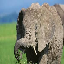

In [19]:
img

In [20]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 74ms/step


'elephants'

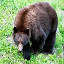

In [23]:
# testing 2
img = image.load_img('/content/dataset/Testing/bears/k4 (103).jpeg',target_size =(64,64))
img

In [24]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 18ms/step


'bears'

In [25]:
#testing 3
img = image.load_img('/content/dataset/Training/crows/Z1  (65).jpg',target_size =(64,64))

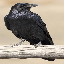

In [26]:
img

In [27]:

x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)
pred =np.argmax(model.predict(x))
op =['bears','crows','elephants','rats']
op[pred]

1/1 [==============================] - 0s 18ms/step


'crows'